In [1]:
import urllib.request
urllib.request.urlretrieve( 'https://gist.github.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/4054f90adfd361b7aa4255e99c2e874664094cea/climate.csv', 
    'climate.txt')

('climate.txt', <http.client.HTTPMessage at 0x1576c35df90>)

In [2]:
import numpy as np
climate_data = np.genfromtxt('climate.txt',delimiter = ',',skip_header = 1)
climate_data

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [ ]:
climate_data.shape

In [3]:
weight = np.array([0.3,0.2,0.5])
yeild = climate_data @ weight
yeild

array([72.2, 59.7, 65.2, ..., 71.1, 80.7, 73.4])

In [ ]:
yeild = yeild.reshape(10000,1)
yeild

In [4]:
np.concatenate((climate_data,yeild),axis = 1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
### broadcasting - when we add two matrix with different dimensions.
arr_1 = np.array([[1,2,3,4],[5,6,7,8],[4,3,2,1],[8,7,6,5]])
arr_2 = np.array([7,8,9,0])
arr_1 + arr_2

In [ ]:
### creating 2 * 3 * 2 
arr_1 = np.array([[[1,2],
                   [3,4],
                   [5,6]],
                  [[7,8],
                   [9,10],
                   [11,12]]])
arr_1
                  
    

In [ ]:
arr_2 = np.array([4,5])
arr_1 + arr_2

In [ ]:
arr_1
for x in arr_1:
     print(x)

In [ ]:
arr_1

In [ ]:
arr_1[1,1,1]
arr_1[0,2,1]

In [ ]:
np.zeros((2,2))

In [ ]:
### analysing tabular data by pandas.



In [5]:
import pandas as pd
import urllib.request
urllib.request.urlretrieve('https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'
,'italy-covid-daywise.csv')


('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1576eb3d1d0>)

In [6]:
covid_df = pd.read_csv('italy-covid-daywise.csv')
covid_df
 

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [ ]:
covid_df.describe()

In [ ]:
covid_df.columns

In [8]:
covid_df['new_cases'][100:]

100    3836.0
101    4204.0
102    3951.0
103    4694.0
104    4092.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 148, dtype: float64

In [ ]:
covid_df[['date','new_cases']][101:]

In [ ]:
covid_df.loc[245]

In [9]:
### for fetching the first n data from the upper rows by using head method and tail method for the lower dataof the dataframe. 

covid_df.tail()

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [ ]:
 covid_df.new_tests.first_valid_index()

In [10]:
total_cases = covid_df.new_cases.sum()
total_death = covid_df.new_deaths.sum()
print((total_cases,total_death))

(271515.0, 35497.0)


In [11]:
death_rate = (total_death / total_cases)*100
print("the overall death rate imn italy is",death_rate,"%")

the overall death rate imn italy is 13.073679170579894 %


In [13]:
high_new_cases = covid_df.new_cases> 1500
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Name: new_cases, Length: 248, dtype: bool

In [14]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN
79,2020-03-19,4207.0,473.0,NaN
80,2020-03-20,5322.0,429.0,NaN


In [15]:
positive_rate = covid_df.new_cases/covid_df.new_tests
positive_rate

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

In [16]:
covid_df['positive_rate'] = covid_df.new_cases/covid_df.new_tests
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [17]:
covid_df.sort_values('new_cases',ascending = False).head(10)

,date,new_cases,new_deaths,new_tests,positive_rate
82,2020-03-22,6557.0,795.0,NaN,NaN
87,2020-03-27,6153.0,660.0,NaN,NaN
81,2020-03-21,5986.0,625.0,NaN,NaN
89,2020-03-29,5974.0,887.0,NaN,NaN
88,2020-03-28,5959.0,971.0,NaN,NaN
83,2020-03-23,5560.0,649.0,NaN,NaN
80,2020-03-20,5322.0,429.0,NaN,NaN
85,2020-03-25,5249.0,743.0,NaN,NaN
90,2020-03-30,5217.0,758.0,NaN,NaN
86,2020-03-26,5210.0,685.0,NaN,NaN


In [18]:
### date-time class in pandas
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [20]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day


AttributeError: 'Series' object has no attribute 'year'

In [28]:
covid_df['week_day'] = pd.DatetimeIndex(covid_df.date).day
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,week_day
0,2019-12-31,0.0,0.0,NaN,NaN,2019,31
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1
2,2020-01-02,0.0,0.0,NaN,NaN,2020,2
3,2020-01-03,0.0,0.0,NaN,NaN,2020,3
4,2020-01-04,0.0,0.0,NaN,NaN,2020,4
...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,30
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,31
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,1
246,2020-09-02,975.0,8.0,NaN,NaN,2020,2


In [30]:
covid_df[covid_df.weekday ==6].newcases.mean()

AttributeError: 'DataFrame' object has no attribute 'weekday'

In [24]:
covid_df.new_cases.mean()

1094.8185483870968

In [32]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,week_day
0,2019-12-31,0.0,0.0,NaN,NaN,2019,31
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1
2,2020-01-02,0.0,0.0,NaN,NaN,2020,2
3,2020-01-03,0.0,0.0,NaN,NaN,2020,3
4,2020-01-04,0.0,0.0,NaN,NaN,2020,4
...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,30
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,31
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,1
246,2020-09-02,975.0,8.0,NaN,NaN,2020,2


In [35]:
covid_year = covid_df.groupby('year')[['new_cases','new_deaths','new_tests']].sum()
covid_year

,new_cases,new_deaths,new_tests
year,,,
2019,0.0,0.0,0.0
2020,271515.0,35497.0,4279456.0


In [39]:
covid_weekday = covid_df.groupby('week_day')[['new_cases','new_deaths','new_tests']].sum()
covid_weekday

,new_cases,new_deaths,new_tests
week_day,,,
1,8037.0,1245.0,177410.0
2,8938.0,1096.0,110502.0
3,8998.0,1350.0,86229.0
4,7143.0,1064.0,102887.0
5,7215.0,1017.0,123586.0
6,7254.0,906.0,117747.0
7,6700.0,1140.0,94441.0
8,6573.0,1000.0,117039.0
9,7475.0,1009.0,121011.0


<Axes: >

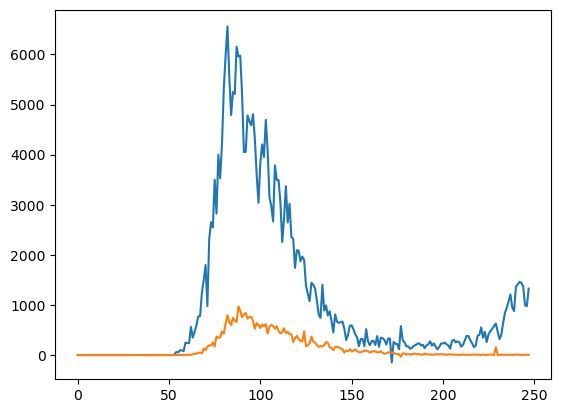

In [49]:
covid_df.new_cases.plot()
covid_df.new_deaths.plot()